<a href="https://colab.research.google.com/github/alejandrodgb/fastai-course22/blob/main/00-OWN-is-it-a-bird-creating-a-model-from-your-own-data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install libraries
import sys

# Preparing notebook for google colab
if 'google.colab' in sys.modules:
    !pip install -Uqq fastai
    !pip install -Uqq duckduckgo_search

In [2]:
# Import libraries
from fastcore.all import *
from duckduckgo_search import ddg_images

We will be classifying wether the image has a cow or a horse. Steps to clasify:
1. Download cow and horse images
2. Fine-tune a pretrained neural network to recognise the two groups
3. Test it on a new image

# Step 1: Download images

In [3]:
# Function to download images
def search_images(term, max_images=200):
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [4]:
urls = search_images('thoroughbred',1)
urls

(#1) ['https://cdn.bloodhorse.com/proclaim/images/2015/08/96806d78-19e7-444e-9053-ca22bb781525_lf-xl.jpg']

In [6]:
# Download images
from fastdownload import download_url
from fastai.vision.all import *

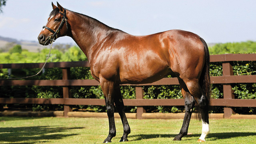

In [8]:
# Download test image
dest = 'data/thoroughbred.jpg'
download_url(urls[0],dest)
Image.open(dest).to_thumb(256,256)

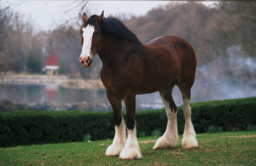

In [9]:
# Download test image
dest = 'data/clydesdale.jpg'
download_url(search_images('clydesdale',1)[0],dest)
Image.open(dest).to_thumb(256,256)

In [24]:
# Search for 200 images of each 
searches = 'thoroughbred','clydesdale'
path = Path('data/what_horse')

from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True,parents=True)
    download_images(dest,urls=search_images(f'{o} photo'))
    sleep(10)
    download_images(dest,urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest,urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

KeyboardInterrupt: 

In [ ]:
# Verify downloads
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

# Step 2: Model training

In [ ]:
# Create a dataloader
dls = DataBlock()